In [26]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [19]:
# Data source: http://course1.winona.edu/bdeppa/FIN%20335/Datasets/US%20Liquor%20Sales.csv

# parse_dates converts the datetime column into datetime objects
# index_col assigns the column as the data frame's index
df = pd.read_csv(
    Path("../Resources/liquor_sales.csv"), parse_dates=True, index_col="datetime"
)

In [20]:
# Display top rows
df.head()

,month,liquor_sales
datetime,,
1980-01-01,1,480
1980-02-01,2,467
1980-03-01,3,514
1980-04-01,4,505
1980-05-01,5,534


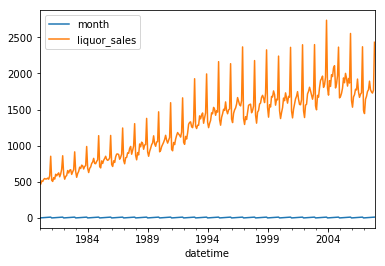

In [21]:
# Sales trend shows a multiplicative pattern
df.plot()

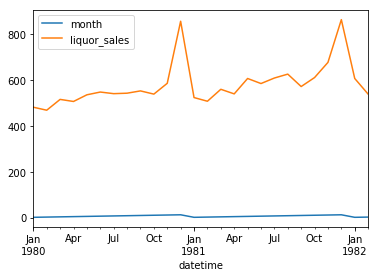

In [22]:
# Sales appear to spike during the holiday season
df[:26].plot()

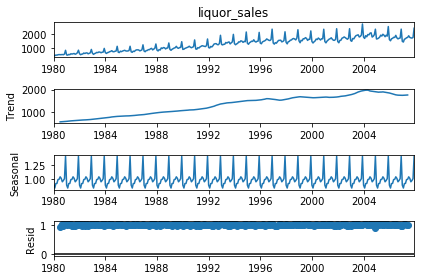

In [23]:
# The time series data is decomposed into trend, seasonality, and residual(noise)
# With the noise removed, an upward trend across years and an annual cycle are shown.
# It's important that you distinguish whether your trends are multiplicative or additive
# https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/
decomposed = seasonal_decompose(df['liquor_sales'], model='multiplicative')
decomposed.plot();

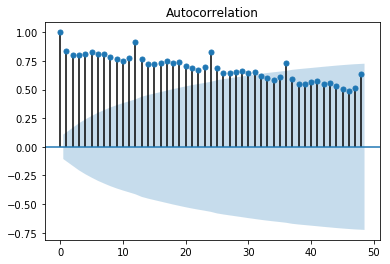

In [24]:
plot_acf(df.liquor_sales, lags=48);

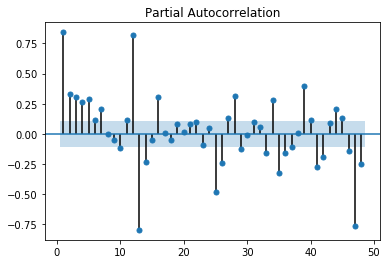

In [32]:
sm.graphics.tsaplots.plot_pacf(df.liquor_sales, lags=48, zero=False);